In [1]:
import sys
import os
copypath = ['../modules', 
            '../Train', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python27.zip', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/plat-linux2', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-tk', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-old', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-dynload', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg']
for p in reversed(copypath):
    sys.path.insert(0, p)
print sys.path
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['DEEPJET'] = '../../DeepJet'
#os.environ['LD_LIBRARY_PATH'] = '../modules:%s'%os.environ['LD_LIBRARY_PATH']
#os.environ['PATH'] = '../scripts:%s'%os.environ['PATH']
#os.environ['CONDA_PREFIX'] = '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu'
#os.environ['LD_PRELOAD'] = '%s/lib/libmkl_core.so:%s/lib/libmkl_sequential.so'%(os.environ['CONDA_PREFIX'],os.environ['CONDA_PREFIX'])
import keras
keras.backend.set_image_data_format('channels_last')

['../modules', '../Train', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python27.zip', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/plat-linux2', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-tk', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-old', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-dynload', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg', '', '/opt/conda/envs/python2/lib/python27.zip', '/opt/conda/envs/python2/lib/python2.7', '/opt/conda/envs/python2/lib/python2.7/plat-linux2', '/opt/conda/envs/python2/lib/python2.7/li

Using TensorFlow backend.


In [2]:
!nvidia-smi

Mon Sep 18 13:29:49 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 375.66                 Driver Version: 375.66                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 0000:04:00.0     Off |                  N/A |
| 27%   36C    P8     9W / 180W |      0MiB /  8114MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    Off  | 0000:05:00.0     Off |                  N/A |
| 27%   35C    P8    10W / 180W |      0MiB /  8114MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [3]:
from keras.models import load_model
from testing import testDescriptor
from argparse import ArgumentParser
from keras import backend as K
from Losses import * #needed!
import os
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from root_numpy import array2root
import pandas as pd

In [4]:
def makePlots(traind, outputDir):

    print 'in makePlots()'
    
    # let's use only first 100k entries
    NENT = 1
    features_val=[fval[::NENT] for fval in traind.getAllFeatures()]
    labels_val=traind.getAllLabels()[0][::NENT,:]
    weights_val=traind.getAllWeights()[0][::NENT]
    spectators_val = traind.getAllSpectators()[0][::NENT,0,:]
    
    print features_val[0].shape
    #print features_val[1].shape
    print spectators_val.shape
    print weights_val.shape
    print labels_val.shape
    
    db_columns = ['fj_jetNTracks',
                          'fj_nSV',
                          'fj_tau0_trackEtaRel_0',
                          'fj_tau0_trackEtaRel_1',
                          'fj_tau0_trackEtaRel_2',
                          'fj_tau1_trackEtaRel_0',
                          'fj_tau1_trackEtaRel_1',
                          'fj_tau1_trackEtaRel_2',
                          'fj_tau_flightDistance2dSig_0',
                          'fj_tau_flightDistance2dSig_1',
                          'fj_tau_vertexDeltaR_0',
                          'fj_tau_vertexEnergyRatio_0',
                          'fj_tau_vertexEnergyRatio_1',
                          'fj_tau_vertexMass_0',
                          'fj_tau_vertexMass_1',
                          'fj_trackSip2dSigAboveBottom_0',
                          'fj_trackSip2dSigAboveBottom_1',
                          'fj_trackSip2dSigAboveCharm_0',
                          'fj_trackSipdSig_0',
                          'fj_trackSipdSig_0_0',
                          'fj_trackSipdSig_0_1',
                          'fj_trackSipdSig_1',
                          'fj_trackSipdSig_1_0',
                          'fj_trackSipdSig_1_1',
                          'fj_trackSipdSig_2',
                          'fj_trackSipdSig_3',
                          'fj_z_ratio']
    
    # some tensor gymnastics to get the flattened SV features (in a 2d tensor)
    #features_shape = features_val[1].shape
    #print (features_shape[0],np.prod(features_shape[1:]))
    #sv_features = np.reshape(features_val[1], (features_shape[0],np.prod(features_shape[1:]))) # C-like index ordering
    sv_columns = ['sv_ptrel',
                          'sv_erel',
                          'sv_phirel',
                          'sv_etarel',
                          'sv_deltaR',
                          'sv_pt',
                          'sv_mass',
                          'sv_ntracks',
                          'sv_normchi2',
                          'sv_dxy',
                          'sv_dxysig',
                          'sv_d3d',
                          'sv_d3dsig',
                          'sv_costhetasvpv'
                         ]
    # this is just to get the flattened SV column names 
    #all_sv_columns = []
    #for i in range(0,5):
    #    for sv_col in sv_columns:
    #        all_sv_columns.append(sv_col+'_'+str(i))
    #print all_sv_columns # ['sv_ptrel_0', 'sv_erel_0', ..., 'sv_d3dsig_4', 'sv_costheta_svpv_4']
    
    spec_columns = ['fj_pt',
                  'fj_eta',
                  'fj_sdmass',
                  'fj_n_sdsubjets',
                  'fj_doubleb',
                  'fj_tau21',
                  'fj_tau32',
                  'npv',
                  'npfcands',
                  'ntracks',
                  'nsv']


    #all_features = np.hstack((features_val[0][:,0,:],sv_features,spectators_val))
    
    all_features = np.hstack((features_val[0][:,0,:],spectators_val))
    

    df = pd.DataFrame(all_features)
    
    #all_columns = db_columns+all_sv_columns+spec_columns
    all_columns = db_columns+spec_columns
    df.columns = all_columns
    
    df['fj_isH'] = labels_val[:,1]
    df['weight'] = weights_val
    
    return df

In [5]:
!rm -r in_Resnet_sv

In [6]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''

outputDir = 'in_Resnet_sv/'
inputDataCollection = '/inputdata/BumbleB/convert_deepDoubleB_simple_train_val_remove_msd40_200/dataCollection.dc'

if os.path.isdir(outputDir):
    raise Exception('output directory must not exists yet')
else: 
    os.mkdir(outputDir)

    
from DataCollection import DataCollection
    
traind=DataCollection()
traind.readFromFile(inputDataCollection)
    
df = makePlots(traind, outputDir)

/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


in makePlots()
ntuple_merged_0.z
ntuple_merged_100.z
ntuple_merged_101.z
ntuple_merged_102.z
ntuple_merged_103.z
ntuple_merged_104.z
ntuple_merged_105.z
ntuple_merged_106.z
ntuple_merged_10.z
ntuple_merged_11.z
ntuple_merged_12.z
ntuple_merged_13.z
ntuple_merged_14.z
ntuple_merged_15.z
ntuple_merged_16.z
ntuple_merged_17.z
ntuple_merged_18.z
ntuple_merged_19.z
ntuple_merged_1.z
ntuple_merged_20.z
ntuple_merged_21.z
ntuple_merged_22.z
ntuple_merged_23.z
ntuple_merged_24.z
ntuple_merged_25.z
ntuple_merged_26.z
ntuple_merged_27.z
ntuple_merged_28.z
ntuple_merged_29.z
ntuple_merged_2.z
ntuple_merged_30.z
ntuple_merged_31.z
ntuple_merged_32.z
ntuple_merged_33.z
ntuple_merged_34.z
ntuple_merged_35.z
ntuple_merged_36.z
ntuple_merged_37.z
ntuple_merged_38.z
ntuple_merged_39.z
ntuple_merged_3.z
ntuple_merged_40.z
ntuple_merged_41.z
ntuple_merged_42.z
ntuple_merged_43.z
ntuple_merged_44.z
ntuple_merged_45.z
ntuple_merged_46.z
ntuple_merged_47.z
ntuple_merged_48.z
ntuple_merged_49.z
ntuple_merged

number of samples 6034593
number of H samples 508543
number of QCD samples 5526050


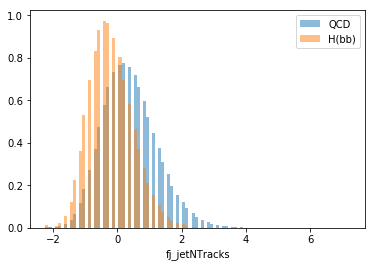

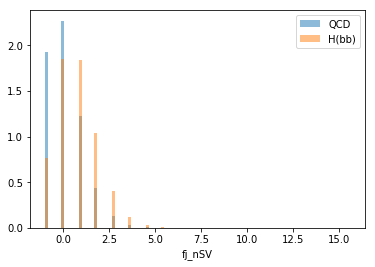

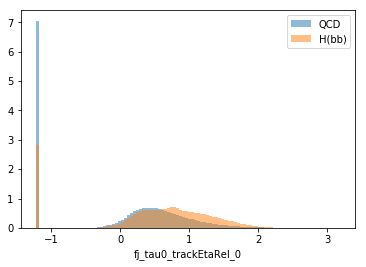

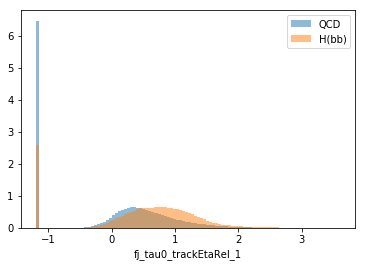

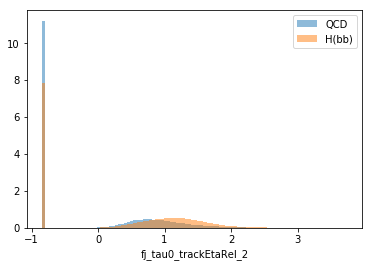

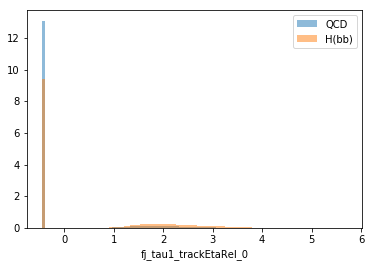

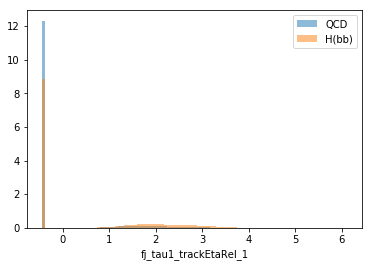

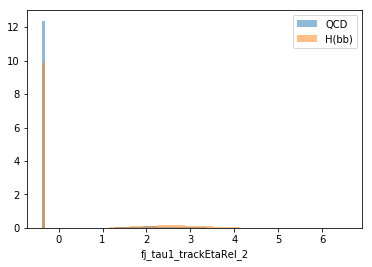

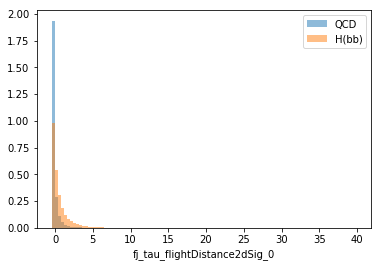

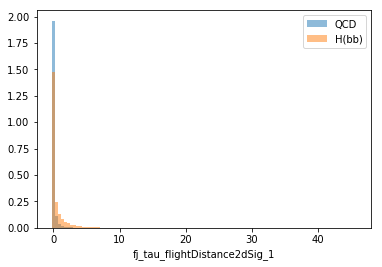

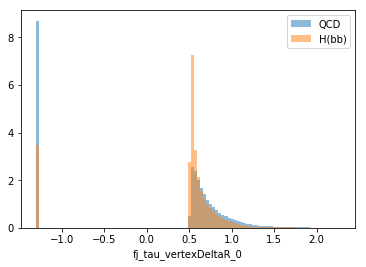

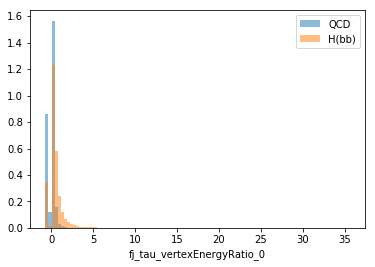

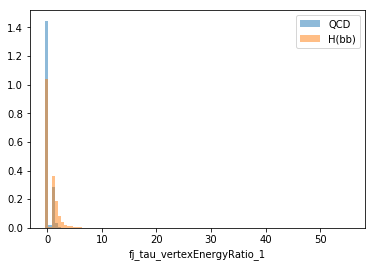

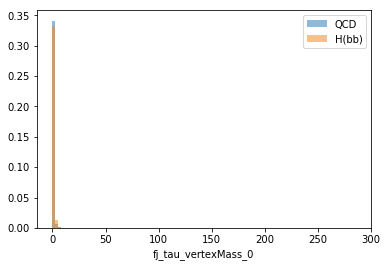

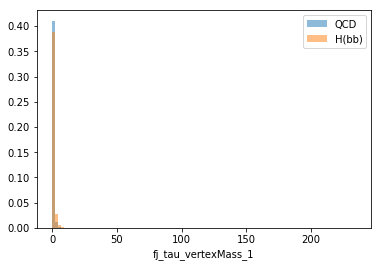

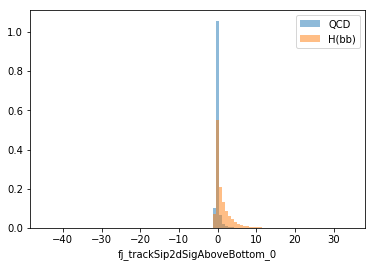

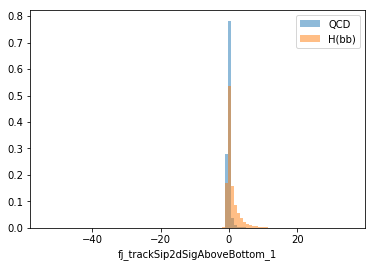

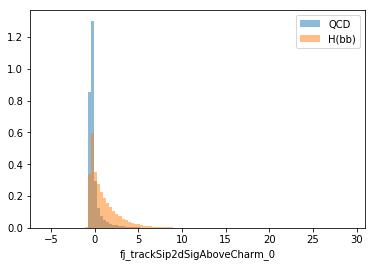

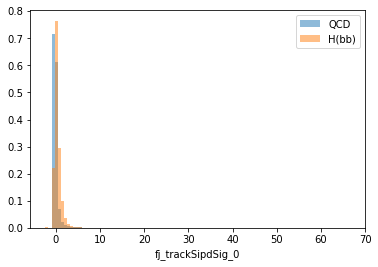

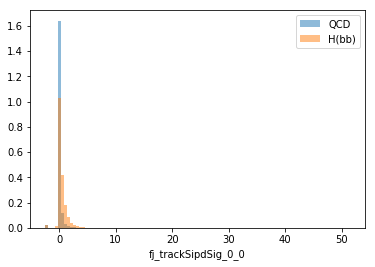

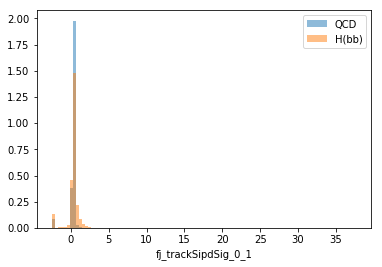

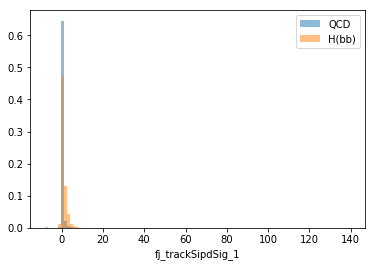

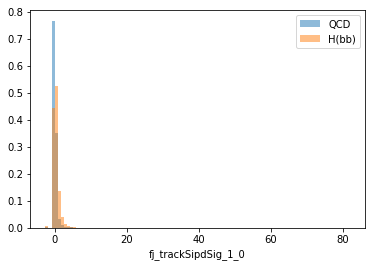

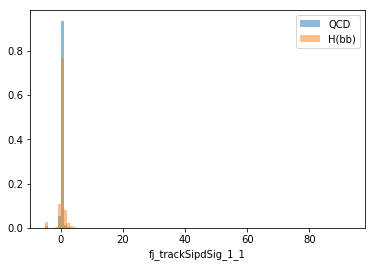

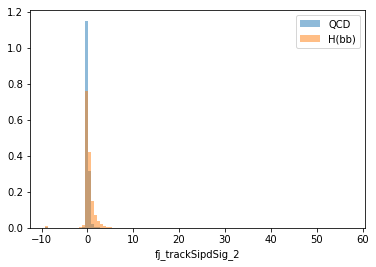

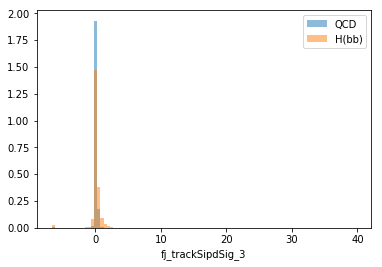

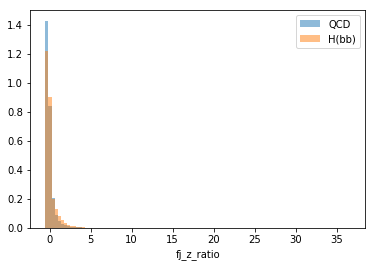

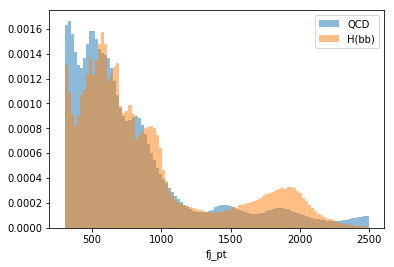

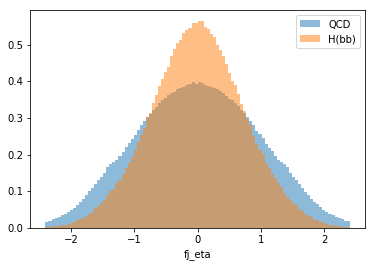

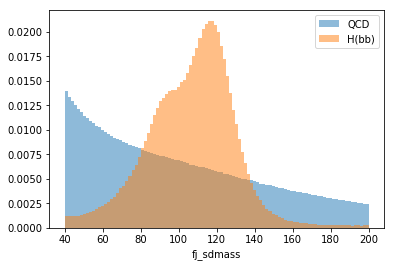

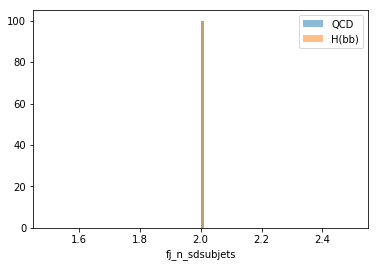

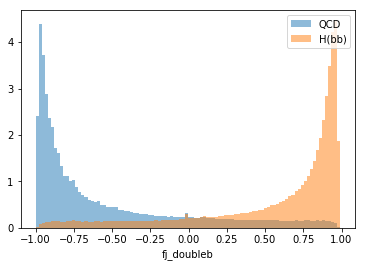

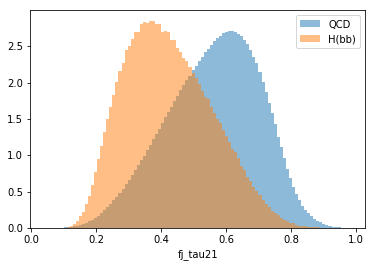

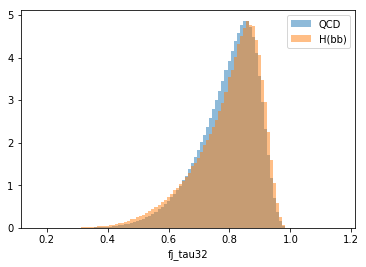

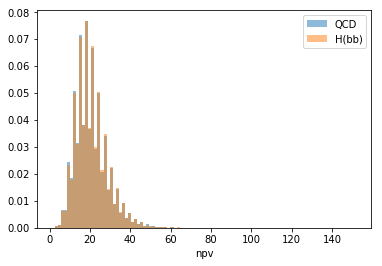

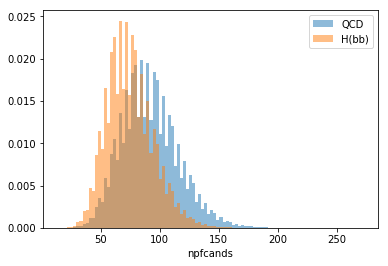

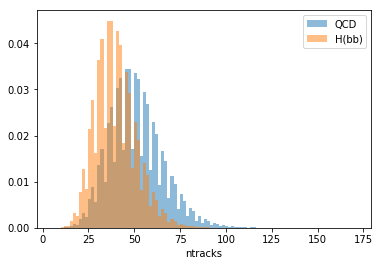

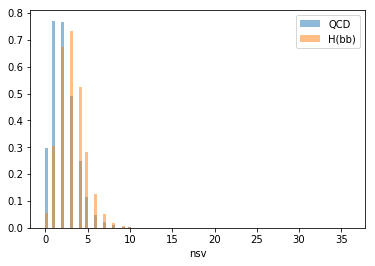

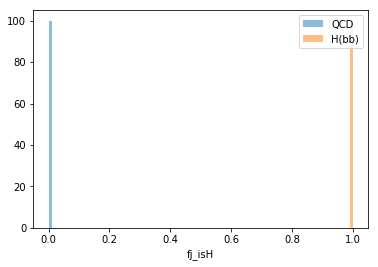

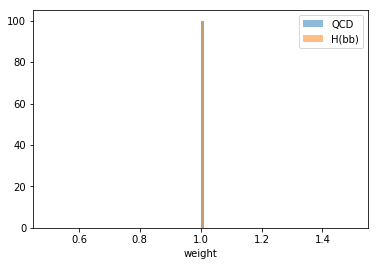

In [8]:
#df_red = df[(df.fj_sdmass > 40.) & (df.fj_sdmass < 200) & (df.fj_pt > 300) & (df.fj_pt < 2500)]
df_red = df
print 'number of samples', len(df_red)
print 'number of H samples', len(df_red[df_red.fj_isH>0.5])
print 'number of QCD samples', len(df_red[df_red.fj_isH<0.5])
for col in df.columns:
    plt.figure()
    plt.hist(df_red[col], bins = 100, weights = 1-df_red['fj_isH'], alpha=0.5,label='QCD',normed=True)
    plt.hist(df_red[col], bins = 100, weights = df_red['fj_isH'], alpha=0.5,label='H(bb)',normed=True)
    plt.xlabel(col)
    plt.legend(loc='upper right')
    plt.savefig(outputDir+col+".pdf")